"""
SPEECh: Scalable Probabilistic Estimates of EV Charging

Code first published in October 2021.

Developed by Siobhan Powell (siobhan.powell@stanford.edu).
"""

# This code produces the data set of driver group profiles that has been posted
### Siobhan Powell, October 2021

In [1]:
from speech import DataSetConfigurations
from speech import SPEECh
from speech import SPEEChGeneralConfiguration
from speech import Plotting
from speech import LoadProfile


In [ ]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
total_evs = 10000
weekday_option = 'weekday'

# data = DataSetConfigurations('NewData', ng=9)
data = DataSetConfigurations('Original16', ng=16)
model = SPEECh(data)
config = SPEEChGeneralConfiguration(model)
config.num_evs(total_evs)
config.groups()

In [4]:
results = {}
n = 10000
for i in range(data.ng):
    j = data.cluster_reorder_dendtoac[i]
    config.group_configs[j].numbers(total_drivers=n)
    config.group_configs[j].load_gmms()
    model = LoadProfile(config, config.group_configs[j], weekday=weekday_option)
    model.calculate_load()
    (pd.DataFrame(model.load_segments_dict)/n).to_csv('Output_Data/group'+str(int(i+1))+'_weekday.csv', index=None)
    results[i] = pd.DataFrame(model.load_segments_dict)/n

In [5]:
total_evs = 10000
weekday_option = 'weekend'

# data = DataSetConfigurations('NewData', ng=9)
data = DataSetConfigurations('Original16', ng=16)
model = SPEECh(data)
config = SPEEChGeneralConfiguration(model)
config.num_evs(total_evs)
config.groups()

results = {}
n = 10000
for i in range(data.ng):
    j = data.cluster_reorder_dendtoac[i]
    config.group_configs[j].numbers(total_drivers=n)
    config.group_configs[j].load_gmms()
    model = LoadProfile(config, config.group_configs[j], weekday=weekday_option)
    model.calculate_load()
    (pd.DataFrame(model.load_segments_dict)/n).to_csv('Output_Data/group'+str(int(i+1))+'_weekend.csv', index=None)
    results[i] = pd.DataFrame(model.load_segments_dict)/n

# Testing:

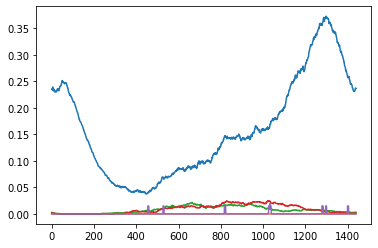

In [6]:
plt.plot(results[5])

In [7]:
test = pd.read_csv('Output_Data/group3_weekday.csv')
test2 = pd.read_csv('Output_Data/group3_weekend.csv')

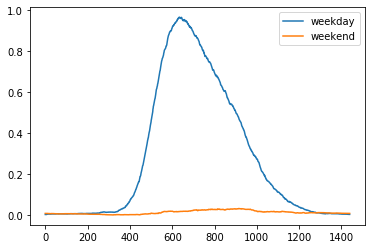

In [8]:
plt.plot(test.sum(axis=1), label='weekday')
plt.plot(test2.sum(axis=1), label='weekend')
plt.legend()
plt.show()

In [9]:
test = pd.read_csv('Output_Data/group4_weekday.csv')
test2 = pd.read_csv('Output_Data/group4_weekend.csv')

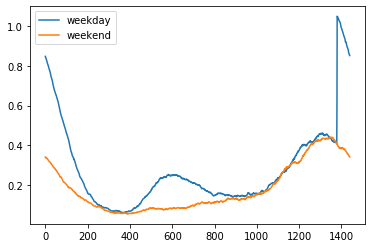

In [10]:
plt.plot(test.sum(axis=1), label='weekday')
plt.plot(test2.sum(axis=1), label='weekend')
plt.legend()
plt.show()